<a href="https://colab.research.google.com/github/agra98/Heart-Disease-Prediction-Logistic-Regression-Model/blob/main/heart_disease_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/"

Mounted at /content/drive
'5.11 WI23 CRBE.XLSX'
 adapter.java
'Agamini Maheesha (1) (1).pdf'
'Agamini Maheesha (1).pdf'
'Agamini Maheesha (2).pdf'
'Agamini Maheesha (3).pdf'
'Agamini Maheesha.pdf'
'Blank Quiz.gform'
'Colab Notebooks'
 CS409
'decorator (1).java'
'decorator (2).java'
'decorator (3).java'
'Decorator Design Pattern (1).pdf'
'Decorator Design Pattern.pdf'
 decorator.java
'factory (1).java'
'factory (2).java'
'factory (3).java'
'Factory Design Pattern.pdf'
 factory.java
 FB_IMG_1710145553673.jpg
'Grey Modern Professional Business Project Presentation.pptx'
'Group No 04.pptx'
'INDUSTRY DAY 2024 - Interview Schedule.xlsx'
'Journal Entry.gdoc'
'lecturer name list'
 Matrix.xlsx
'MCQ - CLSSWB Agamini Maheesha.xlsx'
 MT325
'MT 325 Mid Review.pptx'
 MT409
'MT409 Group 06 Presentation.pdf'
'MT409 Group 06 Presentation.pptx'
 MT410
 OR
 Practice
 Question2.java
'report 2.docx'
'Report .gdoc'
'request letter stage drama.docx'
 S18834
'S18834 MT207 POPUP QUIZ.pdf'
'S18834 Practical Ses

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Practice/framingham.csv')

In [ ]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
data.rename(columns={'male':'Sex_male'}, inplace=True)

# Handling Missing Values


In [ ]:
data.dropna(axis=0,inplace=True)
print(data.shape)
print(data.TenYearCHD.value_counts())

(3658, 16)
TenYearCHD
0    3101
1     557
Name: count, dtype: int64


# Splitting dataset into test and train sets

In [ ]:
X=np.asarray(data[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose']])
Y=np.asarray(data['TenYearCHD'])

x=preprocessing.StandardScaler().fit(X).transform(X)

#Train-and-Test-Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=4)
print('Train Set:',X_train.shape,Y_train.shape)
print('Test Set:',X_test.shape,Y_test.shape)


Train Set: (2560, 6) (2560,)
Test Set: (1098, 6) (1098,)


Exploratary Data Analysis

<ipython-input-9-e0fde32e83ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD',data=data,palette='hls')


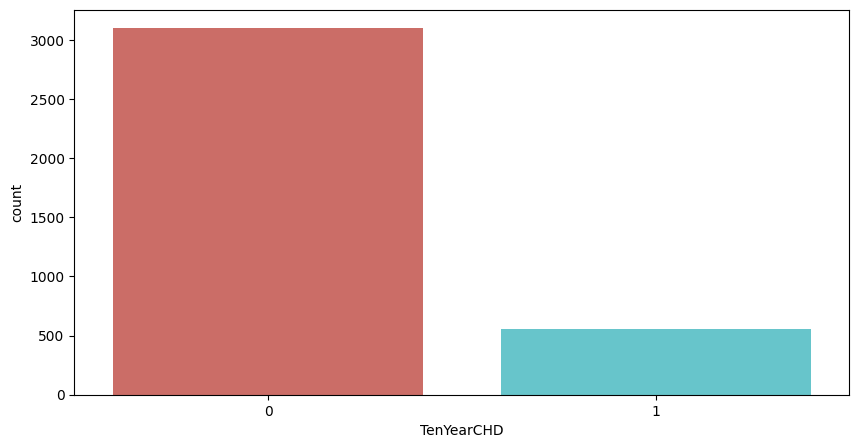

In [ ]:
# counting no. of patients affected with CHD
plt.figure(figsize=(10,5))
sns.countplot(x='TenYearCHD',data=data,palette='hls')
plt.show()

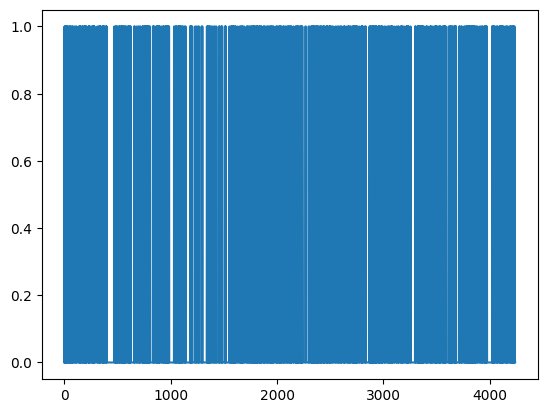

In [ ]:
laste = data['TenYearCHD'].plot()
plt.show()

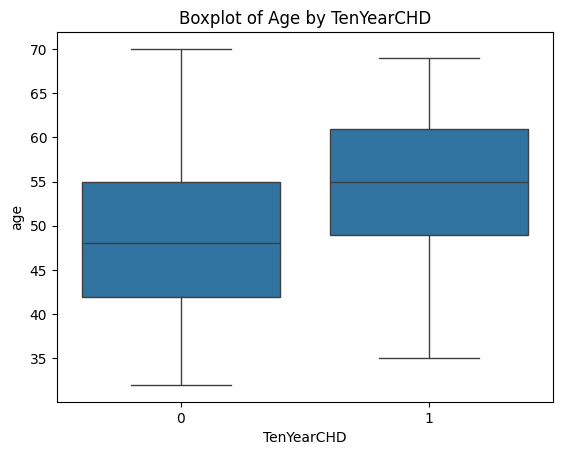

In [ ]:
sns.boxplot(x='TenYearCHD', y='age', data=data)
plt.title('Boxplot of Age by TenYearCHD')
plt.show()

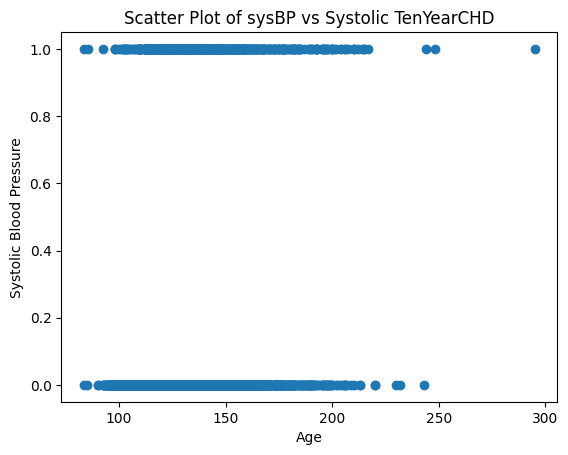

In [ ]:
plt.scatter(data['sysBP'], data['TenYearCHD'])
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure')
plt.title('Scatter Plot of sysBP vs Systolic TenYearCHD')
plt.show()

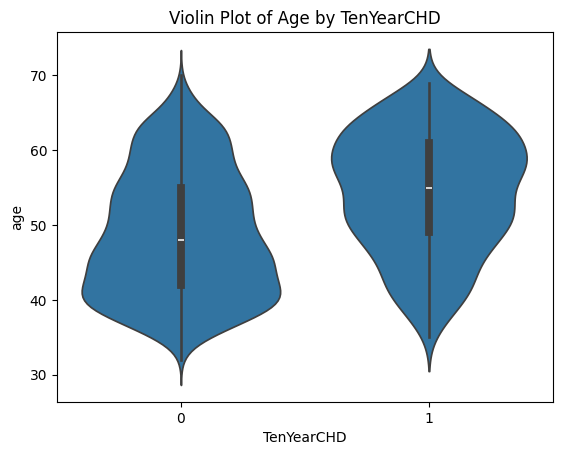

In [ ]:
sns.violinplot(x='TenYearCHD', y='age', data=data)
plt.title('Violin Plot of Age by TenYearCHD')
plt.show()


#Fitting Logistic Regression Model for Heart Disease Prediction

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
y_pred = logreg.predict(X_test)

Evaluating Logistic Regression Model

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is = ',accuracy_score(Y_test,y_pred))

Accuracy of the model is =  0.843351548269581


Confusion Matrix

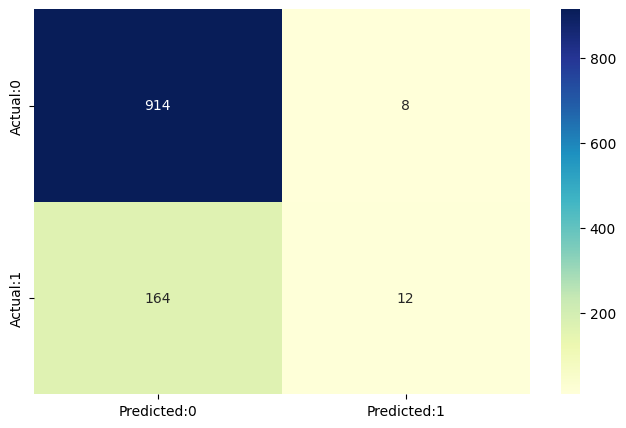

Details of confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       922
           1       0.60      0.07      0.12       176

    accuracy                           0.84      1098
   macro avg       0.72      0.53      0.52      1098
weighted avg       0.81      0.84      0.79      1098



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(Y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu')
plt.show()

print('Details of confusion matrix is =')
print(classification_report(Y_test,y_pred))